<a href="https://colab.research.google.com/github/JMindpalace/Machine_Learning/blob/main/Example/004.%EC%98%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 정의
> 

In [1]:
import pandas as pd
import numpy as np
from google.colab import files

# Read Data-set

In [19]:
files.upload()
movie = pd.read_csv('movie.csv')

Saving movie.csv to movie (2).csv


# Columns
- `Poster_Link` : IMDB의 포스터 링크
- `Series_Title` : 영화 이름
- `Released_Year` : 개봉 연도
- `Certificate` : 영화 증명
- `Runtime` : 영화 시간
- `Genre` : 영화 장르
- `IMDB_Rating` : IMDB의 평가
- `Overview` : 개요
- `Meta_score` : 영화 점수(0 ~ 100)
- `Director` : 감독 이름
- `Star1` , `Star2` , `Star3` , `Star4` : 배우 이름
- `Noofvotes` : 총 투표수
- `Gross` : 영화 수익

In [20]:
movie.info() # 1,000*15 // 타입 // 결측치 Gross가 가장 큰 결측치

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    895 non-null    object 
 4   Runtime        995 non-null    object 
 5   Genre          995 non-null    object 
 6   IMDB_Rating    995 non-null    float64
 7   Overview       995 non-null    object 
 8   Meta_score     841 non-null    float64
 9   Director       995 non-null    object 
 10  Star1          995 non-null    object 
 11  Star2          995 non-null    object 
 12  Star3          995 non-null    object 
 13  Star4          995 non-null    object 
 14  No_of_Votes    995 non-null    float64
 15  Gross          827 non-null    object 
dtypes: float64(3), object(13)
memory usage: 125.1+ KB


In [21]:
# Released_Year에서 숫자가 아닌 데이터는 몇 개? 5개
a = movie[ movie.Released_Year.str.contains(r'[^\d+]') ].index; a

Int64Index([105, 121, 951, 966, 975], dtype='int64')

In [22]:
# Released_Year에 잘못된 데이터가 들어가 있는 행 삭제
movie = movie.drop(a, axis=0)
movie.shape

(995, 16)

In [23]:
# 결측치 행의 shape
movie [movie['Certificate'].isnull() | movie['Meta_score'].isnull() | movie['Gross'].isnull() ].shape

(284, 16)

In [24]:
# Meta_score의 Outlier 정리
movie['Meta_score'].describe(); movie_before = movie.copy()

before_mean = movie_before['Meta_score'].mean()

b = movie.query( 'Meta_score < 0' ).index
movie = movie.drop(b, axis=0)

after_mean = movie['Meta_score'].mean()

(after_mean - before_mean).round(4)

0.0939

In [25]:
# 결측치 확인
movie.duplicated().sum()

0

In [26]:
# Poster_Link의 https://로 시작하지 않는 데이터 >> 시작을 'https://'로 변경
last = movie [ movie["Poster_Link"].str.startswith("https://") == False ]
z = last.index
movie.loc[z, 'Poster_Link'] = 'https://' + movie.loc[z, 'Poster_Link']

In [27]:
movie = movie.dropna()

In [28]:
# Gross 칼럼의 최대값과 75% 사분위값의 차이는? 이상치 - 834,371,417
movie.Gross = movie.Gross.str.replace(',' , '').astype(int)
movie.Gross.max() - movie.Gross.quantile(q=0.75)

834371417.0

In [29]:
# Runtime의 평균값은? 123.7
movie.Runtime = movie.Runtime.str.replace('min' , '').astype(int)
movie.Runtime.mean().round(2)

123.7

In [30]:
# Poster_Link와 Overview를 제거
movie = movie.drop( ['Poster_Link', 'Overview'], axis=1 )
movie.shape

(711, 14)

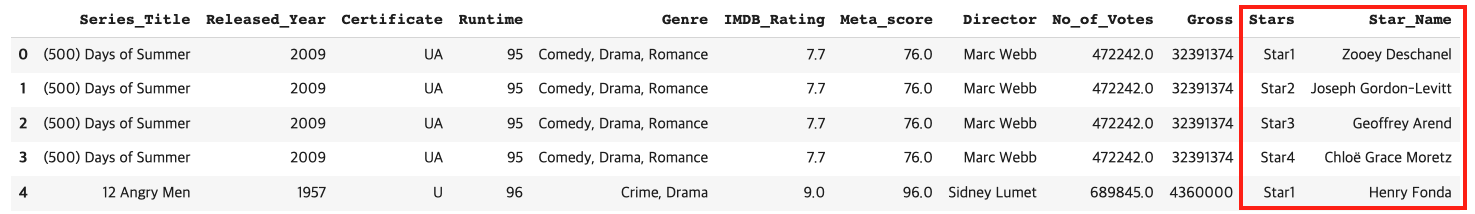

In [31]:
# 위의 포맷으로 변경하시오.
df = pd.melt(movie, id_vars=['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'No_of_Votes', 'Gross'] ,
       value_vars=['Star1', 'Star2', 'Star3', 'Star4'], var_name='Stars', value_name='Star_Name')
df.sort_values(by = ['Series_Title' , 'Stars']).tail()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Stars,Star_Name
2341,Zootopia,2016,U,108,"Animation, Adventure, Comedy",8.0,78.0,Byron Howard,434143.0,341268248,Star4,Jason Bateman
529,Zwartboek,2006,R,145,"Drama, Thriller, War",7.7,71.0,Paul Verhoeven,72643.0,4398392,Star1,Carice van Houten
1240,Zwartboek,2006,R,145,"Drama, Thriller, War",7.7,71.0,Paul Verhoeven,72643.0,4398392,Star2,Sebastian Koch
1951,Zwartboek,2006,R,145,"Drama, Thriller, War",7.7,71.0,Paul Verhoeven,72643.0,4398392,Star3,Thom Hoffman
2662,Zwartboek,2006,R,145,"Drama, Thriller, War",7.7,71.0,Paul Verhoeven,72643.0,4398392,Star4,Halina Reijn


In [32]:
# concat, merge, join
df1 = pd.DataFrame({'a':['a0','a1','a2','a3'],
                   'b':['b0','b1','b2','b3'],
                   'c':['c0','c1','c2','c3']},
                  index = [0,1,2,3])

df2 = pd.DataFrame({'a':['a2','a3','a4','a5'],
                   'b':['b2','b3','b4','b5'],
                   'c':['c2','c3','c4','c5'],
                   'd':['d2','d3','d4','d5']},
                   index = [2,3,4,5])

In [33]:
# concat 열 병합 , 행 병합
pd.concat( [df1, df2], ignore_index=True, axis=1 )
pd.concat( [df1, df2], ignore_index=True )

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
4,a2,b2,c2,d2
5,a3,b3,c3,d3
6,a4,b4,c4,d4
7,a5,b5,c5,d5


In [34]:
# merge
df1.merge(df2, how='inner' , on = ['a'] )
df1.merge(df2, how='outer' , on = ['a'] )
df1.merge(df2, how='left' , on = ['a'] )
df1.merge(df2, how='right' , on = ['a'] )

,a,b_x,c_x,b_y,c_y,d
0,a2,b2,c2,b2,c2,d2
1,a3,b3,c3,b3,c3,d3
2,a4,NaN,NaN,b4,c4,d4
3,a5,NaN,NaN,b5,c5,d5


In [35]:
df1.join(df2, how='right', lsuffix='_x', rsuffix='_y')

,a_x,b_x,c_x,a_y,b_y,c_y,d
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3
4,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,a5,b5,c5,d5
